In this notebook we try to practice all the classification algorithms that we learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:

In [1]:
import itertools
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline


### About dataset

This dataset is about wind Turbines in the US. The _uswtdb.csv_ data set includes details of 63003 Active wind turbines. Select fields that are most relevant for this study are as follows:  

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| t_state        | state where turbine is located                                                        |
| p_name         | name of the wind power project that the turbine is a part of                          |
| p_year         | Year the wind power project became operational and began providing power              |
| p_cap          | cumulative capacity of all turbines in the wind power project, in megawatts           |
| t_manu         | turbine manufacturer - name of the original equipment manufacturer                    |
| t_model        | turbine model                                                                         |
| t_cap          | turbine rated capacity in kilowatt (kW)                                               |
| t_hh           | Tturbine hub height in meters (m)                                                     |
| t_rd           | turbine rotor diameter in meters (m)                                                  |
| t_rsa          |turbine rotor swept area square meters (m^2)                                           |
| t_ttlh         | turbine total height - height of entire wind turbine from ground to tip               |

### Download Data 

In [2]:
!wget -O uswtdb.csv https://raw.githubusercontent.com/Chelseajmz/Wind2020/master/uswtdb2020.csv


--2020-02-13 01:56:43--  https://raw.githubusercontent.com/Chelseajmz/Wind2020/master/uswtdb2020.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 199.232.8.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|199.232.8.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11247458 (11M) [text/plain]
Saving to: ‘uswtdb.csv’

100%[======================================>] 11,247,458  --.-K/s   in 0.1s    

2020-02-13 01:56:44 (98.4 MB/s) - ‘uswtdb.csv’ saved [11247458/11247458]



### Load Data From CSV File  

In [3]:
df = pd.read_csv('uswtdb.csv')
df.head()

,case_id,faa_ors,faa_asn,usgs_pr_id,eia_id,t_state,t_county,t_fips,p_name,p_year,...,t_hh,t_rd,t_rsa,t_ttlh,t_conf_atr,t_conf_loc,t_img_date,t_img_srce,xlong,ylat
0,3073404,NaN,NaN,5806.0,52161.0,CA,Kern County,6029,251 Wind,1987.0,...,NaN,NaN,NaN,NaN,2,3,5/8/18,Digital Globe,-118.352531,35.087852
1,3073414,NaN,NaN,5778.0,52161.0,CA,Kern County,6029,251 Wind,1987.0,...,NaN,NaN,NaN,NaN,2,3,5/8/18,Digital Globe,-118.353035,35.086193
2,3011331,NaN,NaN,4951.0,52161.0,CA,Kern County,6029,251 Wind,1987.0,...,NaN,NaN,NaN,NaN,2,3,5/8/18,Digital Globe,-118.356697,35.086670
3,3001002,NaN,NaN,4950.0,52161.0,CA,Kern County,6029,251 Wind,1987.0,...,NaN,NaN,NaN,NaN,2,3,5/8/18,Digital Globe,-118.357185,35.086594
4,3073425,NaN,NaN,4957.0,52161.0,CA,Kern County,6029,251 Wind,1987.0,...,NaN,NaN,NaN,NaN,2,3,5/8/18,Digital Globe,-118.360420,35.084709


Let’s see how many of each class is in our data set 

# Data visualization and pre-processing



In [4]:
df2 = df.drop(['eia_id','t_fips','faa_ors', 'faa_asn', 'usgs_pr_id','t_conf_atr','t_conf_loc','t_img_srce','t_img_date','xlong','ylat'], axis=1)
df2.head()

,case_id,t_state,t_county,p_name,p_year,p_tnum,p_cap,t_manu,t_model,t_cap,t_hh,t_rd,t_rsa,t_ttlh
0,3073404,CA,Kern County,251 Wind,1987.0,169,16.055,Vestas North America,NaN,95.0,NaN,NaN,NaN,NaN
1,3073414,CA,Kern County,251 Wind,1987.0,169,16.055,Vestas North America,NaN,95.0,NaN,NaN,NaN,NaN
2,3011331,CA,Kern County,251 Wind,1987.0,169,16.055,Vestas North America,NaN,95.0,NaN,NaN,NaN,NaN
3,3001002,CA,Kern County,251 Wind,1987.0,169,16.055,Vestas North America,NaN,95.0,NaN,NaN,NaN,NaN
4,3073425,CA,Kern County,251 Wind,1987.0,169,16.055,Vestas North America,NaN,95.0,NaN,NaN,NaN,NaN


## Explore: Growth Trajectory and Prediction

In [8]:
year_sum = df2.groupby('p_year')['t_cap'].sum().reset_index()
year_sum['cap_year']= year_sum['t_cap'] / 1000 
year_sum['cum_sum'] = year_sum['cap_year'].cumsum()

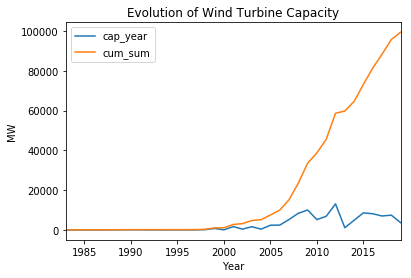

In [9]:
#year_sum.plot(ax = year_sum['p_year'], style = 'k-')
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
year_sum.plot(ax = ax, x='p_year', y=['cap_year','cum_sum'])
ax.set_xlabel('Year')
ax.set_ylabel('MW')
ax.set_title('Evolution of Wind Turbine Capacity')
fig.show()

Fitting into a Growth Model: Polynomial or Exponential (population growth) 

In [10]:
year_sum.head()

,p_year,t_cap,cap_year,cum_sum
0,1983.0,28080.0,28.080,28.080
1,1984.0,1300.0,1.300,29.380
2,1985.0,5445.0,5.445,34.825
3,1986.0,8480.0,8.480,43.305
4,1988.0,18400.0,18.400,61.705


In [11]:
# Creating train and test dataset
msk = np.random.rand(len(year_sum)) < 0.8
train = year_sum[msk]
test = year_sum[~msk]

In [12]:
# Modeling growth 
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

train_x = np.asanyarray(train[['p_year']])
train_y = np.asanyarray(train[['cum_sum']])

test_x = np.asanyarray(test[['p_year']])
test_y = np.asanyarray(test[['cum_sum']])


poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)

In [13]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[ 0.00000000e+00 -6.47640803e+05  1.62482054e+02]]
Intercept:  [6.45353718e+08]


In [14]:
## Testing Result 
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)
r2 = r2_score(test_y_ , test_y)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )



Mean absolute error: 2670.57
Residual sum of squares (MSE): 15271368.68
R2-score: 0.99


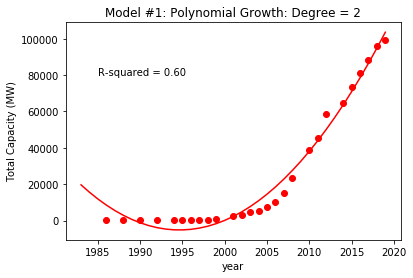

In [23]:
plt.scatter(train['p_year'], train['cum_sum'], color='r')
year = np.arange(1983, 2020, 1)
cumsum = clf.intercept_[0]+ clf.coef_[0][1]* year + clf.coef_[0][2]* np.power(year, 2)
plt.plot(year, cumsum, '-r')
plt.xlabel('year')
plt.ylabel('Total Capacity (MW)')
plt.title('Model #1: Polynomial Growth: Degree = 2')
## plt.text(0.6, 0.5, 'R2 = %0.4f' % r2)
plt.text(1985, 80000, 'R-squared = %0.2f' %r2)
plt.show()

## Exponential Growth

In [15]:
## exponential function
def exp (t, a , x0):
    return x0 * np.exp (t * a) 
year_sum.head()

,p_year,t_cap,cap_year,cum_sum
0,1983.0,28080.0,28.080,28.080
1,1984.0,1300.0,1.300,29.380
2,1985.0,5445.0,5.445,34.825
3,1986.0,8480.0,8.480,43.305
4,1988.0,18400.0,18.400,61.705


In [21]:
x = year_sum['p_year']
y = year_sum['cum_sum']
exp_grow_0 = np.polyfit(x, np.log(y), 1)
print(exp_grow_0)

[ 2.66843699e-01 -5.26423847e+02]


In [22]:
exp_grow = np.polyfit(x, np.log(y), 1, w = np.sqrt(y))
print(exp_grow)

[ 1.61859257e-01 -3.15020716e+02]


In [25]:
# Compute R-squared of the exponential fit -> too low! 
residuals = y - cumsum_exp
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y - np.mean(y))**2)
r2_exp = 1 - (ss_res / ss_tot)
print("R2-score: %.2f" % r2_exp)

R2-score: 0.94


Text(0.5, 1.0, 'Model #2: Exponential Growth')

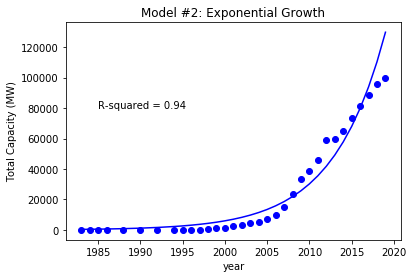

In [26]:
plt.scatter(x,y, color='b')
#    y ≈ exp(-0.401) * exp(0.105 * x) = 0.670 * exp(0.105 * x)
# (^ biased towards small values)
#year = np.arange(1983, 2020, 1)
cumsum_exp = np.exp(exp_grow[1]) * np.exp(exp_grow[0] * x)
plt.plot(x, cumsum_exp, '-b')
plt.xlabel('year')
plt.ylabel('Total Capacity (MW)')
plt.text(1985, 80000, 'R-squared = %0.2f' %r2_exp)
plt.title('Model #2: Exponential Growth')

## Selecting Top States by Capacity

In [10]:
###df.groupby(['t_state', 't_cap']).sum()
###df.groupby(['t_state'])[['t_cap']].sum()
### 'ranking' ranks the states by the total amount of wind capacity generated (sum in KiloWatts)
df2['rank_st'] = df2.groupby('t_state')['t_cap'].transform(np.sum).rank(ascending=False, method = 'dense')
df2 = df2.dropna()
df2.head()

,case_id,t_state,t_county,p_name,p_year,p_tnum,p_cap,t_manu,t_model,t_cap,t_hh,t_rd,t_rsa,t_ttlh,rank_st,big_state
188,3049503,IA,Story County,30 MW Iowa DG Portfolio,2017.0,10,30.0,Nordex,AW125/3000,3000.0,87.5,125.0,12271.85,150.0,2.0,BIG
189,3063269,IA,Story County,30 MW Iowa DG Portfolio,2017.0,10,30.0,Nordex,AW125/3000,3000.0,87.5,125.0,12271.85,150.0,2.0,BIG
190,3049500,IA,Story County,30 MW Iowa DG Portfolio,2017.0,10,30.0,Nordex,AW125/3000,3000.0,87.5,125.0,12271.85,150.0,2.0,BIG
191,3049504,IA,Poweshiek County,30 MW Iowa DG Portfolio,2017.0,10,30.0,Nordex,AW125/3000,3000.0,87.5,125.0,12271.85,150.0,2.0,BIG
192,3060912,IA,Story County,30 MW Iowa DG Portfolio,2017.0,10,30.0,Nordex,AW125/3000,3000.0,87.5,125.0,12271.85,150.0,2.0,BIG


In [11]:
df2['big_state'] = df2['rank_st'].apply(lambda x: 'BIG' if (x <= 5)  else 'SMALL')
df2['big_state'].value_counts(normalize=True)
## big_state selects the top 5 (why 5: to create a balanced class label)

BIG      0.545927
SMALL    0.454073
Name: big_state, dtype: float64

In [12]:
df3 = DataFrame(df2, columns= ['t_state','t_cap','big_state'])
selectBigSt = df3.loc[df3['big_state'] == 'BIG']
selectBigSt.head()

,t_state,t_cap,big_state
188,IA,3000.0,BIG
189,IA,3000.0,BIG
190,IA,3000.0,BIG
191,IA,3000.0,BIG
192,IA,3000.0,BIG


In [13]:
big_state = selectBigSt['t_state'].unique()
print(big_state)

['IA' 'KS' 'CA' 'TX' 'OK']


## Zooming in on the Top 5 States 

In [17]:
state_sum = df2.groupby(['t_state','p_year'])['t_cap'].sum().reset_index()
state_sum['cap_year']= state_sum['t_cap'] / 1000 
bigState = state_sum.loc[state_sum['t_state'].isin(big_state)]
bigState.head()

,t_state,p_year,t_cap,cap_year
21,CA,1983.0,28080.0,28.080
22,CA,1984.0,1300.0,1.300
23,CA,1985.0,5445.0,5.445
24,CA,1986.0,8480.0,8.480
25,CA,1988.0,18400.0,18.400


In [18]:
bigState.shape

(102, 4)

### Pivot: Added Capacity per State per Year

In [19]:
pivot1 = bigState.pivot(index='p_year', columns='t_state', values='cap_year')
pivot1.head()

t_state,CA,IA,KS,OK,TX
p_year,,,,,
1983.0,28.080,NaN,NaN,NaN,NaN
1984.0,1.300,NaN,NaN,NaN,NaN
1985.0,5.445,NaN,NaN,NaN,NaN
1986.0,8.480,NaN,NaN,NaN,NaN
1988.0,18.400,NaN,NaN,NaN,NaN


Text(0.5, 0.98, 'Capacity Contribution per State per Year')

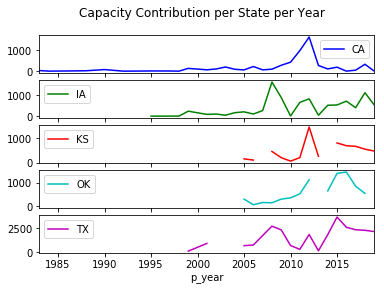

In [20]:
## CA,IA and TX show continuous capacity contribution 
## CA and IA are earliest contributors  
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
col = pd.Series(pivot1.columns)
fig2, axes = plt.subplots(col.size,1, sharex = True)
for i in range(col.size):
    pivot1.plot(ax = axes[i],y = col[i], color = colors[i])
fig2.suptitle('Capacity Contribution per State per Year')

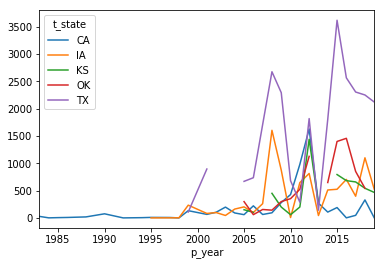

In [25]:
pivot1.plot(stacked=False)
##ax2.set_title('Capacity Contribution by the Top 5 States')



In [21]:

#ax = pd.Series()
#for i in range(1, col.size):
    ax[i] = fig.add_subplot(1, 1, i)
    pivot1.plot(ax = ax[i-1], x='p_year', y=col[i-1])
#plt.show()

NameError: name 'fig' is not defined

In [22]:
col = pd.Series(pivot1.columns)
col[0]

'CA'

# Pre-processing:  Feature selection/extraction

### Lets look at the day of the week people get the loan 

We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4 

In [7]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)

## Convert Categorical features to numerical values

Lets look at gender:

In [40]:
df2.groupby(['t_cap'])['big_state'].value_counts(normalize=True)

t_cap   big_state
50.0    SMALL        0.966667
        BIG          0.033333
60.0    BIG          1.000000
65.0    BIG          0.967805
        SMALL        0.032195
75.0    BIG          1.000000
80.0    SMALL        1.000000
90.0    BIG          1.000000
95.0    BIG          0.978448
        SMALL        0.021552
100.0   SMALL        0.754098
        BIG          0.245902
105.0   BIG          1.000000
108.0   BIG          0.991736
        SMALL        0.008264
120.0   BIG          1.000000
150.0   BIG          1.000000
160.0   BIG          0.912698
        SMALL        0.087302
225.0   BIG          0.980198
        SMALL        0.019802
230.0   SMALL        1.000000
250.0   BIG          0.675000
        SMALL        0.325000
275.0   SMALL        1.000000
350.0   BIG          1.000000
400.0   SMALL        1.000000
450.0   BIG          1.000000
500.0   BIG          0.871795
        SMALL        0.128205
                       ...   
2350.0  BIG          1.000000
2370.0  BIG          1

86 % of female pay there loans while only 73 % of males pay there loan


Lets convert male to 0 and female to 1:


In [9]:
## Gender coded: male to 0, female to 1 
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)

## One Hot Encoding  
#### How about education?

In [10]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Feature befor One Hot Encoding

In [11]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame 

In [12]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)

### Feature selection

Lets defind feature sets, X:

In [13]:
X = Feature

What are our lables?

In [14]:
y = df['loan_status'].values
y[0:3]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF'], dtype=object)

## Normalize Data 

Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [15]:
X = preprocessing.StandardScaler().fit(X).transform(X)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


# Classification 

Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression

__ Notice:__ 
- You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
- You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
- You should include the code of the algorithm in the following cells.

# K Nearest Neighbor(KNN)
Notice: You should find the best k to build the model with the best accuracy.  
**warning:** You should not use the __loan_test.csv__ for finding the best k, however, you can split your train_loan.csv into train and test to find the best __k__.

In [16]:
## KNN - Import Libraries
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.neighbors import KNeighborsClassifier

## KNN - Training 

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 4)

## KNN - Solving for best K based on Jaccard and on F1-Score

Ks = 20
JC = np.zeros((Ks-1))
F1 = np.zeros((Ks-1))
for k in range(1,Ks):
    nb  = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    yhat = nb.predict(X_test)
    JC[k-1] =  metrics.jaccard_similarity_score(y_test, yhat, normalize=True)
    F1[k-1] = metrics.f1_score(y_test, yhat,average = 'macro')
print('For the purpose of this project, the best K is chosen by Jaccard Index, which is: ', JC.argmax())

NB = KNeighborsClassifier(n_neighbors= JC.argmax()).fit(X_train, y_train)


For the purpose of this project, the best K is chosen by Jaccard Index, which is:  6


# Decision Tree

In [17]:
## Decision Tree - Import Library 
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 3)

## Creating an instance of the decision tree DT and Train it 

dt = DecisionTreeClassifier(criterion="entropy", max_depth = 5)
dt.fit(X_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# Support Vector Machine

In [18]:
## Testing different SVM kernels 
X = np.asarray(Feature)
y = np.asarray(df['loan_status'])
y[0:5]
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
# RBF 
from sklearn import svm

kernel = 'rbf'
clf = svm.SVC(kernel = kernel)
clf.fit(X_train, y_train)
yhat = clf.predict(X_test)


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


# Logistic Regression

In [19]:
# Logistic/Sigmoid Regression 
X = Feature
y = pd.get_dummies(df['loan_status'], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

# Import package for Logistic Regression 
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(solver = 'lbfgs')
lg.fit(X_train, y_train)


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

# Model Evaluation using Test set

In [20]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

First, download and load the test set:

In [21]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2019-09-29 20:50:28--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

100%[======================================>] 3,642       --.-K/s   in 0s      

2019-09-29 20:50:28 (214 MB/s) - ‘loan_test.csv’ saved [3642/3642]



### Load Test Set for evaluation 

In [22]:
test_df = pd.read_csv('loan_test.csv')

## Data preprocessing 
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek 
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
testFeature = test_df[['Principal','terms','age','Gender','weekend']]
testFeature = pd.concat([testFeature,pd.get_dummies(test_df['education'])], axis=1)
# Drop one of the education dummies to avoid multicollinearity 
testFeature.drop(['Master or Above'], axis = 1,inplace=True)
testFeature.rename(columns={'Bechalor':'Bachelor'},inplace = True)
X = testFeature
y = test_df['loan_status'].values

In [23]:
## KNN - Training 
#X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 4)

#nb  = KNeighborsClassifier(n_neighbors= 6).fit(X_train, y_train)
yhat_test = NB.predict(X)
JC_KNN =  metrics.jaccard_similarity_score(y, yhat_test, normalize=True)
F1_KNN = metrics.f1_score(y, yhat_test,average = 'macro')

## KNN Results 
KNN = np.asarray([round(JC_KNN,3),round(F1_KNN,3),'NA']).transpose()
KNN

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


array(['0.741', '0.426', 'NA'], dtype='<U32')

In [24]:
## Decision Tree 
#DT = DecisionTreeClassifier(criterion="entropy", max_depth = 5)
#DT.fit(X_train, y_train)
## Predictions using the tree 
PT2 = dt.predict(X)

## Accuracy of the Tree 
JC_DT =  metrics.jaccard_similarity_score(y, PT2, normalize=True)
F1_DT = metrics.f1_score(y, PT2,average = 'macro')
DT = np.asarray([round(JC_DT,3),round(F1_DT,3),'NA']).transpose()
DT

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


array(['0.741', '0.426', 'NA'], dtype='<U32')

In [25]:
## SVM 
yhat_SVM = clf.predict(X)
JC_SVM =  metrics.jaccard_similarity_score(y, yhat_SVM, normalize=True)
F1_SVM = metrics.f1_score(y, yhat_SVM ,average = 'macro')
SVM = np.asarray([round(JC_SVM,3),round(F1_SVM,3),'NA']).transpose()
SVM

array(['0.759', '0.497', 'NA'], dtype='<U32')

In [26]:
## Logistic Regression 
y_LG = pd.get_dummies(test_df['loan_status'], drop_first=True)
yhat_lg = lg.predict(X)
lgProb_test = lg.predict_proba(X)

JC_LG = metrics.jaccard_similarity_score(y_LG, yhat_lg, normalize=True)
F1_LG = metrics.f1_score(y_LG, yhat_lg, average = 'macro')
LL_LG = metrics.log_loss(y_LG, lgProb_test, normalize=True)
LG = np.asarray([round(JC_LG,3),round(F1_LG,3),round(LL_LG,3)]).transpose()
LG

array([0.722, 0.476, 0.479])

# Report
You should be able to report the accuracy of the built model using different evaluation metrics:

In [27]:
# Report in the below format
# Initiate dataframe with the columns 
columns = ['Jaccard', 'F1-score','LogLoss']
report = pd.DataFrame(columns = columns)
report.loc['KNN'] = KNN
report.loc['Decision Tree '] = DT
report.loc['SVM'] = SVM
report.loc['LogisticRegression'] = LG
report.index.name = 'Algorithm'
report

,Jaccard,F1-score,LogLoss
Algorithm,,,
KNN,0.741,0.426,NA
Decision Tree,0.741,0.426,NA
SVM,0.759,0.497,NA
LogisticRegression,0.722,0.476,0.479


<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

<p>Copyright &copy; 2018 <a href="https://cocl.us/DX0108EN_CC">Cognitive Class</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.</p>